# Balancing Dataset

### Importing Libraries

In [365]:

import numpy as np
import pandas as pd

from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns


### Importing Dataset

In [366]:
data = pd.read_csv(r'Creditcard_data.csv')


In [367]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [368]:
data.shape
data.Class.value_counts()

0    763
1      9
Name: Class, dtype: int64

In [369]:
# separate non-fraudulent and fraudulent data
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]

In [370]:
# take only 763 0's sample
data_0 = data_0.sample(n=763)

In [371]:
data = data_1.append(data_0)

data.Class.value_counts()
data.to_csv('creditcard.csv')


In [372]:
df=pd.read_csv('creditcard.csv')
df.sort_values(by=['Time'],inplace=True)
df.to_csv('creditcard.csv')

In [373]:
# check the number of 1s and 0s
count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 9
Not Fraudulent "0": 763
1.1795543905635648


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


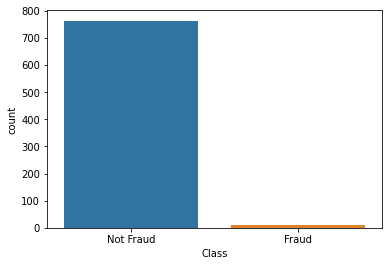

In [374]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [375]:
# check for null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

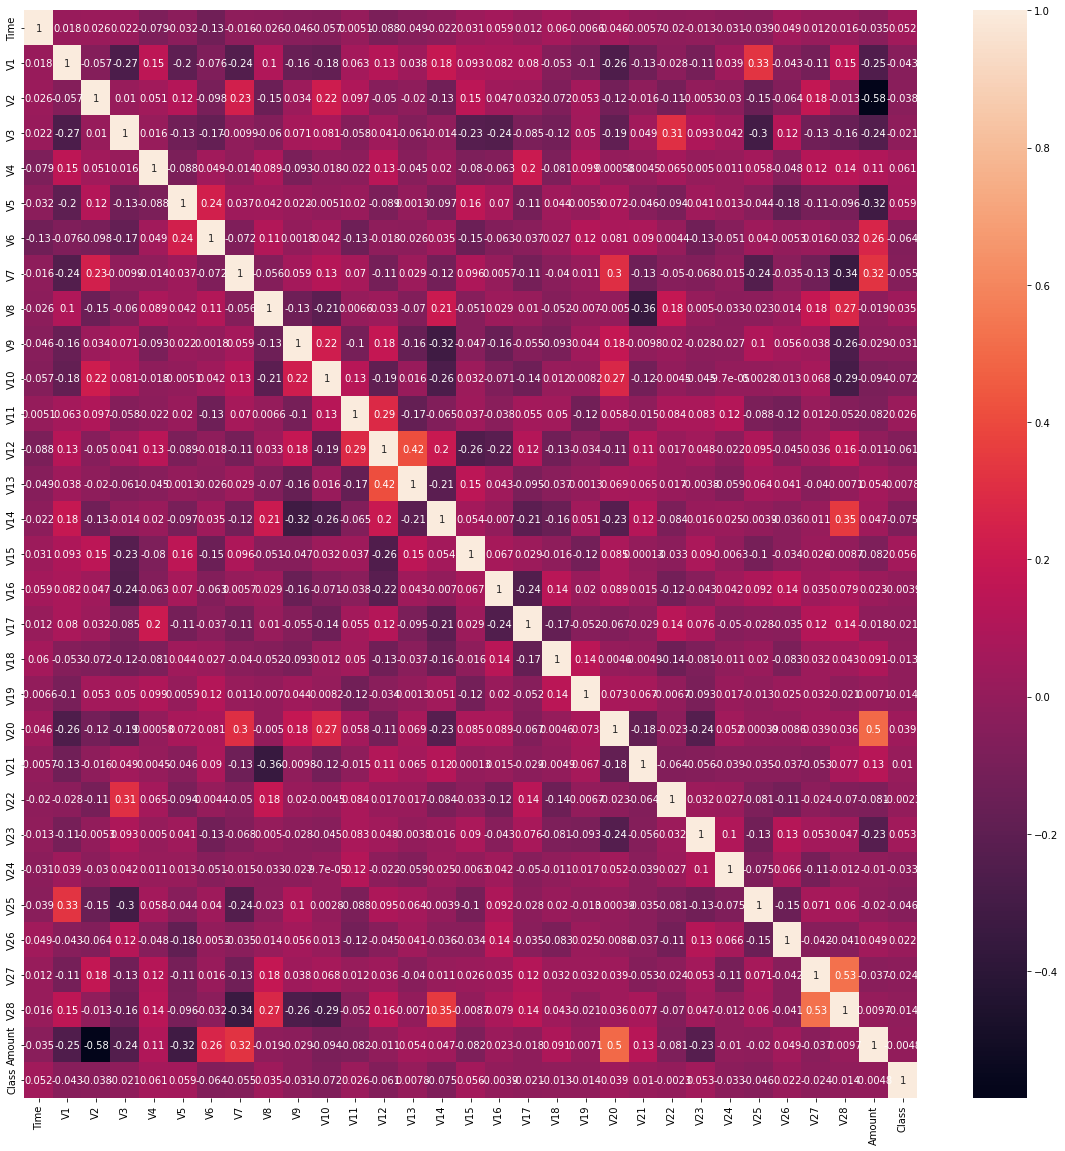

In [376]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Response And Target Variable

In [377]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(9, 763)

In [378]:
# train test splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40,shuffle=True)


In [379]:
# fitting the model using logistic regression
model =  LogisticRegression()

model.fit(x, y)

y_predict = model.predict(x)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [380]:
accuracy_score(y_predict, y)

0.9883419689119171

In [381]:
np.unique(y_predict)

array([0, 1])

### The matrix trap

In [382]:
# import library
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)

# Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

Accuracy score is: 0.9948186528497409


In [383]:
confusion_matrix(xgb_y_predict, y_test)

array([[192,   1],
       [  0,   0]])

### Resampling Techniques

In [384]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# divide class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

In [385]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (763, 31)

class 1: (9, 31)


### 1. Random Under Sampling

total class of 1 and 0:
 0    9
1    9
Name: Class, dtype: int64


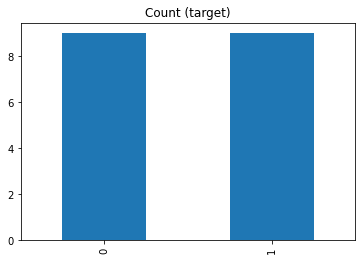

In [386]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

### 2. Random Over Sampling

class count of 1 and 0:
 1    763
0    763
Name: Class, dtype: int64


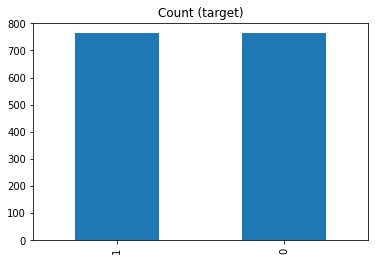

In [387]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Class'].value_counts())

# plot the count
test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Creating five samples

In [388]:
results = pd.read_csv('creditcard.csv')
print(len(results))


772


In [389]:
# Let the s.d. =2 , confidence %=95%, z=1.96, margin of error =16%
sd=2
z=1.96
moe=0.16
n=pow(z*(sd/moe),2)
n

600.25

In [390]:
data = pd.read_csv(r'creditcard.csv')
s1=data.sample(600)
s2=data.sample(600)
s3=data.sample(600)
s4=data.sample(600)
s5=data.sample(600)


## Creating 4 samples using different sampling texhniques






In [391]:
# Obtain simple random sample
df = pd.read_csv(r'creditcard.csv',nrows=770)
simple_random_sample = df.sample(n=500).sort_values(by='Amount')

# Save the sample mean in a separate variable
simple_random_mean = round(simple_random_sample['Amount'].mean(),3)

# View sampled data frame
simple_random_sample.to_csv('SimpleRandomSample.csv')



In [392]:
# Define systematic sampling function
df = pd.read_csv(r'creditcard.csv',nrows=770)
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
    
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(df, 3)

# Save the sample mean in a separate variable
systematic_mean = round(systematic_sample['Amount'].mean(),3)

# View sampled data frame
systematic_sample.to_csv('SystematicSample.csv')

In [393]:
# Define cluster sampling function
df = pd.read_csv(r'creditcard.csv',nrows=770)
def cluster_sampling(df, number_of_clusters):
    
    try:
        # Divide the units into cluster of equal size
        df['cluster_id'] = np.repeat([range(1,number_of_clusters+1)],len(df)/number_of_clusters)

        # Create an empty list
        indexes = []

        # Append the indexes from the clusters that meet the criteria
        # For this formula, clusters id must be an even number
        for i in range(0,len(df)):
            if df['cluster_id'].iloc[i]%2 == 0:
                indexes.append(i)
        cluster_sample = df.iloc[indexes]
        return(cluster_sample)
    
    except:
        print("The population cannot be divided into clusters of equal size!")
        
# Obtain a cluster sample and save it in a new variable
cluster_sample = cluster_sampling(df,10)

# Save the sample mean in a separate variable
cluster_mean = round(cluster_sample['Time'].mean(),3)

# View sampled data frame
cluster_sample.to_csv('ClusterSample.csv')

In [394]:
# Define stratified random sampling function
# Create data dictionary
df = pd.read_csv(r'creditcard.csv',nrows=770)

df_sample = df.groupby("Class", group_keys=False).apply(lambda x:x.sample(frac=0.6))

df_sample.to_csv('StratifiedRandomSample.csv')

## Applying Gaussian Naive Bayes Model

In [410]:
import sklearn
from sklearn.metrics import accuracy_score
df=pd.read_csv('SimpleRandomSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25)
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Simple Random Sample",accuracy)

import sklearn
from sklearn.metrics import accuracy_score
df=pd.read_csv('SystematicSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25)
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Systematic Sample",accuracy)

import sklearn
from sklearn.metrics import accuracy_score
df=pd.read_csv('StratifiedRandomSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25)
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Stratified Random Sample",accuracy)

import sklearn
from sklearn.metrics import accuracy_score
df=pd.read_csv('ClusterSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25)
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Cluster Sample",accuracy)

Accuracy for Simple Random Sample 0.984
Accuracy for Systematic Sample 0.9846153846153847
Accuracy for Stratified Random Sample 0.9741379310344828
Accuracy for Cluster Sample 0.979381443298969


## Applying XGB Classification Model

In [440]:
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('SystematicSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=.4)
xgb_model = XGBClassifier().fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
xgb_score = accuracy_score(y_test,xgb_y_pred)
print("Accuracy for Systematic Sample",xgb_score)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('SimpleRandomSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=.4)
xgb_model = XGBClassifier().fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
xgb_score = accuracy_score(y_test,xgb_y_pred)
print("Accuracy for Simple Random Sample",xgb_score)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('ClusterSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4)
xgb_model = XGBClassifier().fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
xgb_score = accuracy_score(y_test,xgb_y_pred)
print("Accuracy for Cluster Sample",xgb_score)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('StratifiedRandomSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4)
xgb_model = XGBClassifier().fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
xgb_score = accuracy_score(y_test,xgb_y_pred)
print("Accuracy for Stratified Random Sample",xgb_score)

Accuracy for Systematic Sample 0.970873786407767
Accuracy for Simple Random Sample 0.995
Accuracy for Cluster Sample 0.987012987012987
Accuracy for Stratified Random Sample 0.9837837837837838


## Applying Logistic Regression Model

In [449]:
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('SystematicSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4,shuffle=True)
lr =  LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy for Systematic Sample",accuracy)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('SimpleRandomSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4,shuffle=True)
lr =  LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy for Simple Random Sample",accuracy)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('ClusterSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4,shuffle=True)
lr =  LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy for Cluster Sample",accuracy)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('StratifiedRandomSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4,shuffle=True)
lr =  LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy for Stratified Random Sample",accuracy)

Accuracy for Systematic Sample 0.9805825242718447
Accuracy for Simple Random Sample 0.995
Accuracy for Cluster Sample 0.987012987012987
Accuracy for Stratified Random Sample 0.9837837837837838


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

## Applying Extra Trees Model

In [454]:
from sklearn.ensemble import ExtraTreesClassifier
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('SystematicSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
et_clf = ExtraTreesClassifier(n_jobs=-1, n_estimators=100, max_depth=100, min_samples_leaf=5,max_features=10)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4,shuffle=True)
et_clf = ExtraTreesClassifier(n_estimators=250, random_state=20)
et_clf.fit(x_train, y_train)
y_pred = et_clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy for Systematic Sample",accuracy)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('SimpleRandomSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
et_clf = ExtraTreesClassifier(n_jobs=-1, n_estimators=100, max_depth=100, min_samples_leaf=5,max_features=10)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4,shuffle=True)
et_clf = ExtraTreesClassifier(n_estimators=250, random_state=20)
et_clf.fit(x_train, y_train)
y_pred = et_clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy for Simple Random Sample",accuracy)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('ClusterSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
et_clf = ExtraTreesClassifier(n_jobs=-1, n_estimators=100, max_depth=100, min_samples_leaf=5,max_features=10)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4,shuffle=True)
et_clf = ExtraTreesClassifier(n_estimators=250, random_state=20)
et_clf.fit(x_train, y_train)
y_pred = et_clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy for Cluster Sample",accuracy)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('StratifiedRandomSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
et_clf = ExtraTreesClassifier(n_jobs=-1, n_estimators=100, max_depth=100, min_samples_leaf=5,max_features=10)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4,shuffle=True)
et_clf = ExtraTreesClassifier(n_estimators=250, random_state=20)
et_clf.fit(x_train, y_train)
y_pred = et_clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy for Stratified Random Sample",accuracy)

Accuracy for Systematic Sample 0.970873786407767
Accuracy for Simple Random Sample 0.985
Accuracy for Cluster Sample 0.9935064935064936
Accuracy for Stratified Random Sample 0.9945945945945946


## Applying Random Forest Model

In [488]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('SystematicSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
reg = RandomForestRegressor(n_estimators = 1, random_state = 0)
x_trainRFR, x_testRFR, y_trainRFR, y_testRFR = train_test_split(X, y, test_size=0.4)
reg.fit(x_trainRFR, y_trainRFR) 
y_pred = reg.predict(x_testRFR)
accuracy = accuracy_score(y_testRFR,y_pred.round())

print("Accuracy for Systematic Sample",accuracy)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('SimpleRandomSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
reg = RandomForestRegressor(n_estimators = 1, random_state = 0)
x_trainRFR, x_testRFR, y_trainRFR, y_testRFR = train_test_split(X, y, test_size=0.4)
reg.fit(x_trainRFR, y_trainRFR) 
y_pred = reg.predict(x_testRFR)
accuracy = accuracy_score(y_testRFR,y_pred.round())

print("Accuracy for Simple Random Sample",accuracy)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('ClusterSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
reg = RandomForestRegressor(n_estimators = 1, random_state = 0)
x_trainRFR, x_testRFR, y_trainRFR, y_testRFR = train_test_split(X, y, test_size=0.4)
reg.fit(x_trainRFR, y_trainRFR) 
y_pred = reg.predict(x_testRFR)
accuracy = accuracy_score(y_testRFR,y_pred.round())

print("Accuracy for Cluster Sample",accuracy)

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
df=pd.read_csv('StratifiedRandomSample.csv')
X = df.loc[:, df.columns != "Class"]
y = df['Class']
reg = RandomForestRegressor(n_estimators = 1, random_state = 0)
x_trainRFR, x_testRFR, y_trainRFR, y_testRFR = train_test_split(X, y, test_size=0.4)
reg.fit(x_trainRFR, y_trainRFR) 
y_pred = reg.predict(x_testRFR)
accuracy = accuracy_score(y_testRFR,y_pred.round())

print("Accuracy for Stratified Random Sample",accuracy)

Accuracy for Systematic Sample 0.9805825242718447
Accuracy for Simple Random Sample 0.995
Accuracy for Cluster Sample 0.9805194805194806
Accuracy for Stratified Random Sample 0.9945945945945946
